In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os
import openpyxl
import xlrd

Alan Modified Version + bar graph to plot graph

Text(0, 0.5, 'Time in Zone (%)')

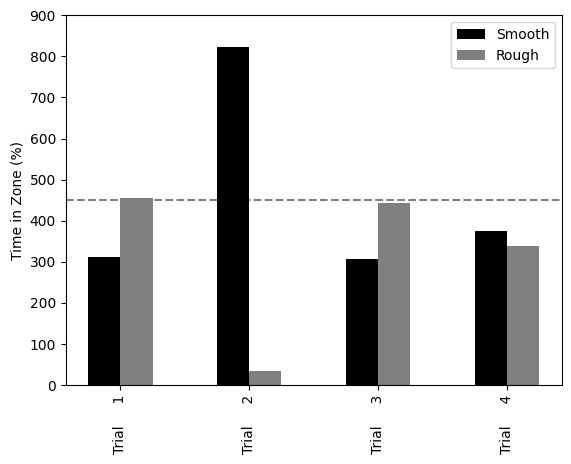

In [4]:
## choose file
file = r"N:\Liu_Custer\Innate_Perference_BHHs\InnateTexturePerference_20241015\Export Files\Statistics-InnateTexturePerference_20241015.xls"
## read data
data = pd.read_excel(file,header=[0,1,2,3],index_col=0)

## extract columns of interest
smooth_perc = data['In zone']['Smooth / Center-point']['Cumulative Duration']['s']
rough_perc = data['In zone']['Rough / Center-point']['Cumulative Duration']['s']

## plot

xaxis = np.arange(len(data.index))
ax = plt.axes()

ax.bar(xaxis-0.25,smooth_perc,width=0.25,align='edge',color='k',label='Smooth')
ax.bar(xaxis,rough_perc,width=0.25,align='edge',color='gray',label='Rough')
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(np.array(data.index),rotation=90)
ax.axhline(7.5*60,color='gray',linestyle='--',zorder=-1)
ax.set_ylim([0,15 * 60])
ax.legend()
ax.set_ylabel('Time in Zone (%)')

In [6]:
folder_path = r"N:\Liu_Custer\Innate_Perference_BHHs\InnateTexturePerference_20241015\Export Files\Statistics-InnateTexturePerference_20241015.xls"
file_pattern = '*.json' 
files = glob.glob(os.path.join(folder_path, file_pattern)) 
files.sort(key= lambda x: x[-20:-5]) 

mouseID = 'BHH1'

list_of_files = [] 

for file in files:
    if mouseID in file:
        list_of_files.append(file)

smooth_perc = data['In zone']['Smooth / Center-point']['Cumulative Duration']['s']
rough_perc = data['In zone']['Rough / Center-point']['Cumulative Duration']['s']
session_date = []
        
CNO_files = []
SALINE_files = []

CNO_summary = {}
SALINE_summary = {}

print("All files for mouseID:", list_of_files)

for file in list_of_files:
    print(file) 
    if ('' in file) or ('' in file):
        CNO_files.append(file)
    elif ('' in file) or ('' in file):
        SALINE_files.append(file)

print("CNO files:", CNO_files)
print("SALINE files:", SALINE_files)


CNO_time_in_R = []
CNO_time_in_S = []
SALINE_time_in_R = []
SALINE_time_in_S = []

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_time_in_R.append(data['In zone']['Rough / Center-point']['Cumulative Duration']['s'])#the ones labeled with substance "A"(or D?)
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_time_in_R.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
    
CNO_time_in_R = np.array(CNO_time_in_R)
SALINE_time_in_R  = np.array(SALINE_time_in_R)
print(SALINE_time_in_R.mean(),CNO_time_in_R.mean())

CNO_summary[mouseID] = CNO_time_in_R.mean()
SALINE_summary[mouseID] = SALINE_time_in_R.mean()


All files for mouseID: []
CNO files: []
SALINE files: []
nan nan


C:\Users\custe\AppData\Local\Temp\ipykernel_8176\2275666119.py:53: RuntimeWarning: Mean of empty slice.
  print(SALINE_time_in_R.mean(),CNO_time_in_R.mean())
C:\Users\custe\AppData\Local\Temp\ipykernel_8176\2275666119.py:55: RuntimeWarning: Mean of empty slice.
  CNO_summary[mouseID] = CNO_time_in_R.mean()
C:\Users\custe\AppData\Local\Temp\ipykernel_8176\2275666119.py:56: RuntimeWarning: Mean of empty slice.
  SALINE_summary[mouseID] = SALINE_time_in_R.mean()


BAD version from CL

In [23]:
file_path = r'C:\2\Statistics_InnateTexturePerference_20240509.csv'
#redo all the formating for each file for better read
encodings = ['utf-8', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        data = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1')
        print(f"Successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with encoding: {encoding}")
else:
    raise ValueError("Unable to read file with any of the attempted encodings")

Successfully read with encoding: utf-8


In [7]:
file_path = r"N:\Liu_Custer\Innate_Perference_BHHs\InnateTexturePerference_20241015\Export Files\Statistics-InnateTexturePerference_20241015.xls"
data = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1') 

print("File loaded successfully")
print(data.columns) 
print(data.head()) 

File loaded successfully
Index(['ÐÏà¡±á'], dtype='object')
                                                                                                                                                                                                                                     ÐÏà¡±á
NaN \("$"#,##0\)! [Red]\("$"#,##0\)" \("$"#,##0.00\)' [Red]\("$"#,##0.00\)7 _("$"* \(#,##0\) _("$"* "-"_) _(@_). _(* \(#,##0\) _(* "-"_) _(@_)? _("$"* \(#,##0.00\) _("$"* "-"??_) _(@_)6 _(* \(#,##0.00\) _(* "-"??_)   _(@_)à
    NaN             NaN                  NaN                NaN                     NaN              NaN          NaN      NaN           NaN       NaN      NaN                 NaN            NaN      NaN              NaN              NaN
                                                                                                                                                                                                                         NaN     

In [43]:
for column in data.columns:
    if column != 'Trial':
        values = data[column].tolist()

In [41]:
values

['Trial     1,7200.87,7.74687,-18640.6,20555,92,98,6,86,61,341.04,2.08,36.6694,62,494.8,0,53.202',
 'Trial     2,5374.73,5.78227,-833.742,704.621,77,83,6,71,53,275.4,0,29.6116,63,465.44,0.52,50.0452',
 'Trial     3,5188.79,5.58487,-21288.4,21499.2,47,51,4,46,37,219.04,0.28,23.5517,59,625.28,13.16,67.2315',
 'Trial     4,8056.64,8.71057,-1030.46,1051.79,105,108,3,101,65,316.458,4.5214,34.2129,80,499.875,0,54.0425',
 'Trial     5,5049.98,5.43289,-23533.6,23493.1,49,54,5,48,88,380.08,0.04,40.8671,29,290.68,331.96,31.2546',
 'Trial     6,8252.99,8.87877,-17634.2,15058.6,139,150,11,131,85,322.84,0.04,34.7125,102,467.36,1.04,50.2516',
 'Trial     7,3375.11,3.63103,-772.506,694.819,38,38,0,37,54,249.2,0.44,26.7945,32,620.76,1.92,66.7455']

In [82]:
def annotate_bars(ax, values):
    for i, value in enumerate(values):
        ax.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

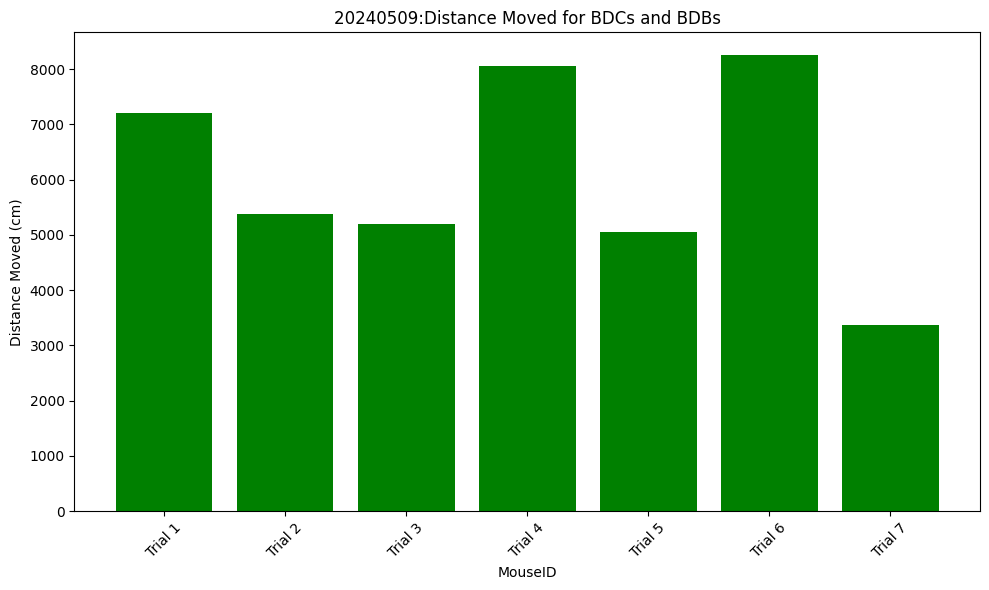

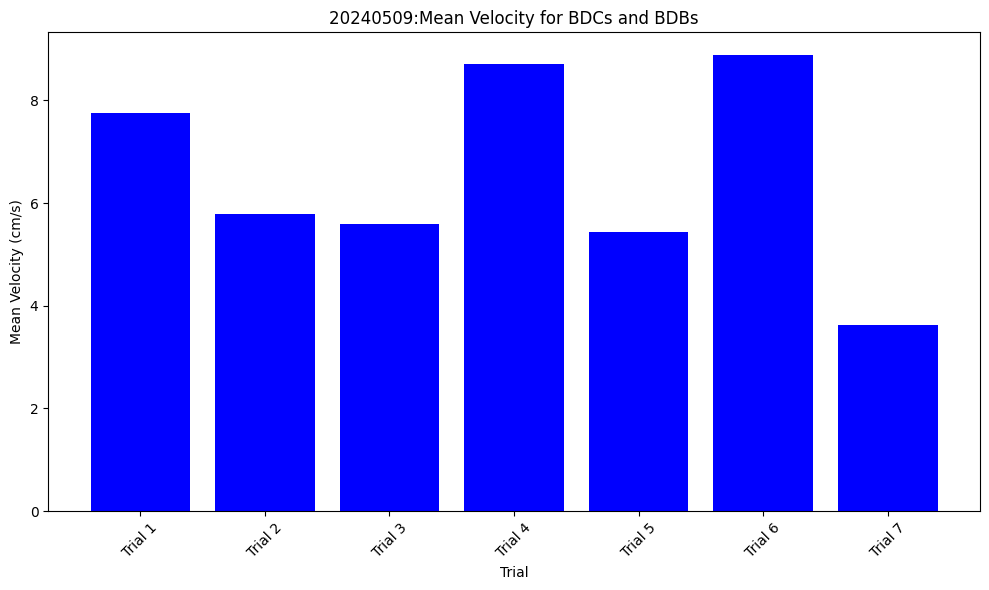

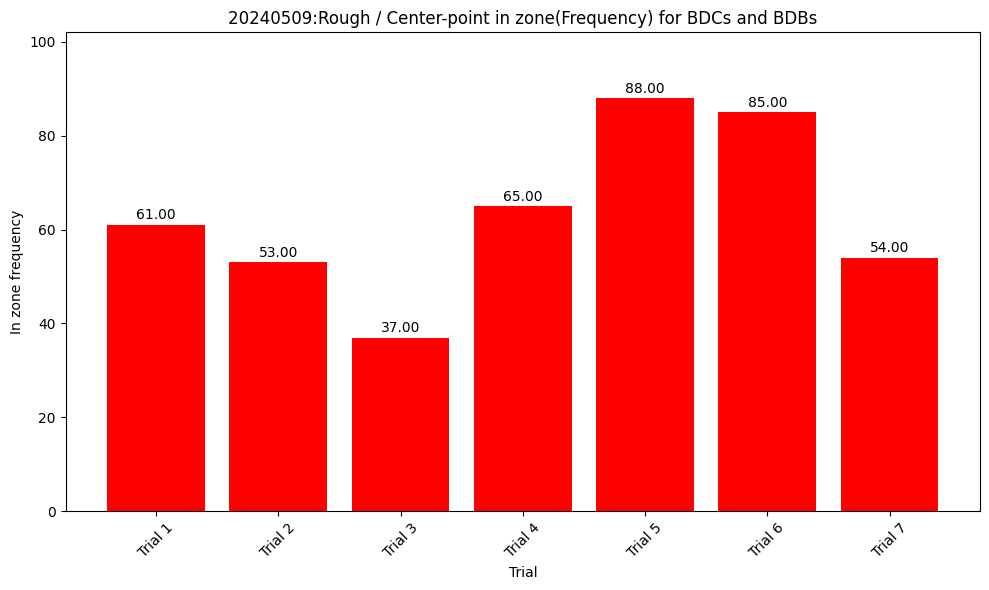

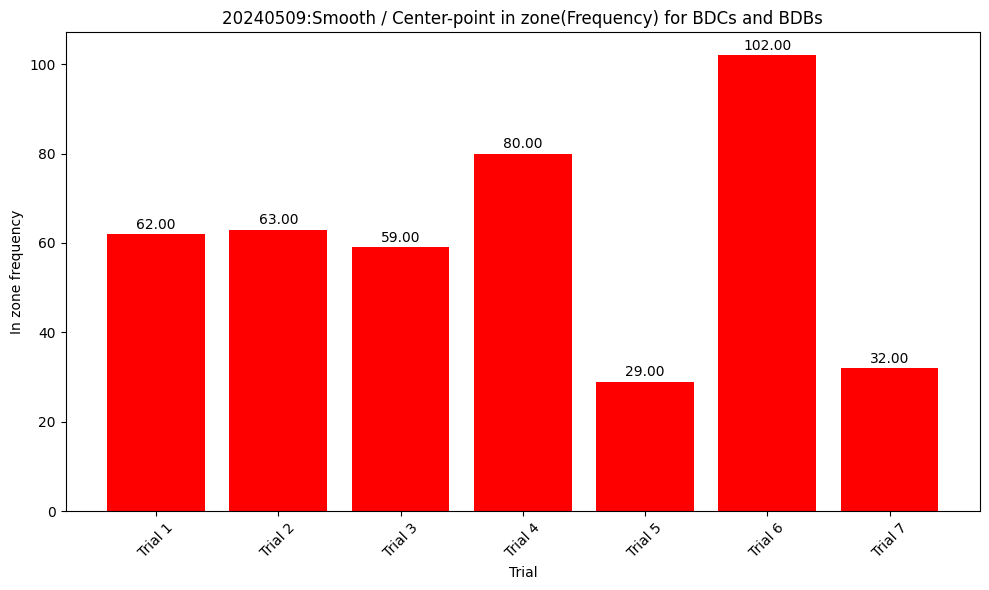

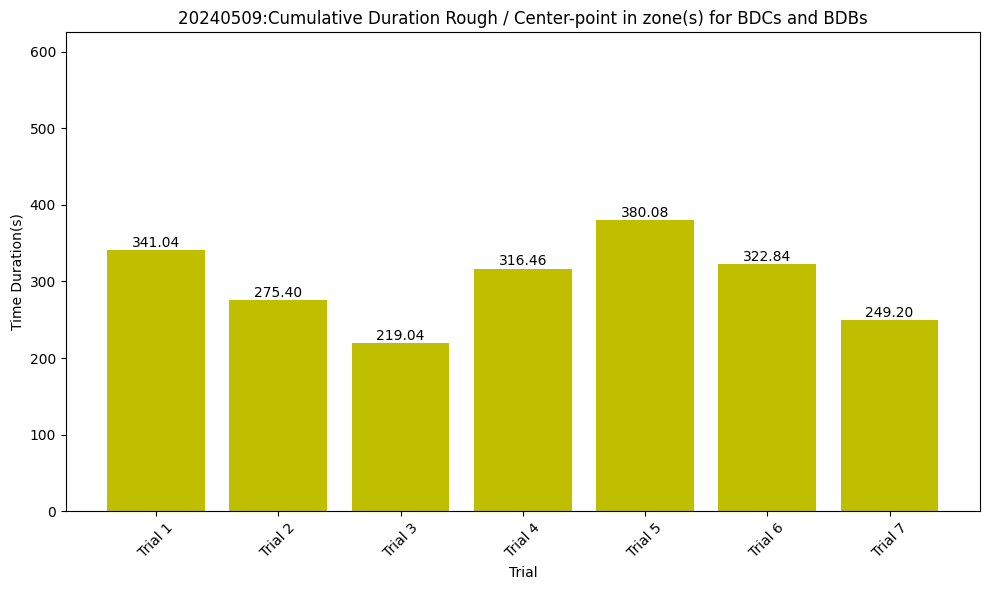

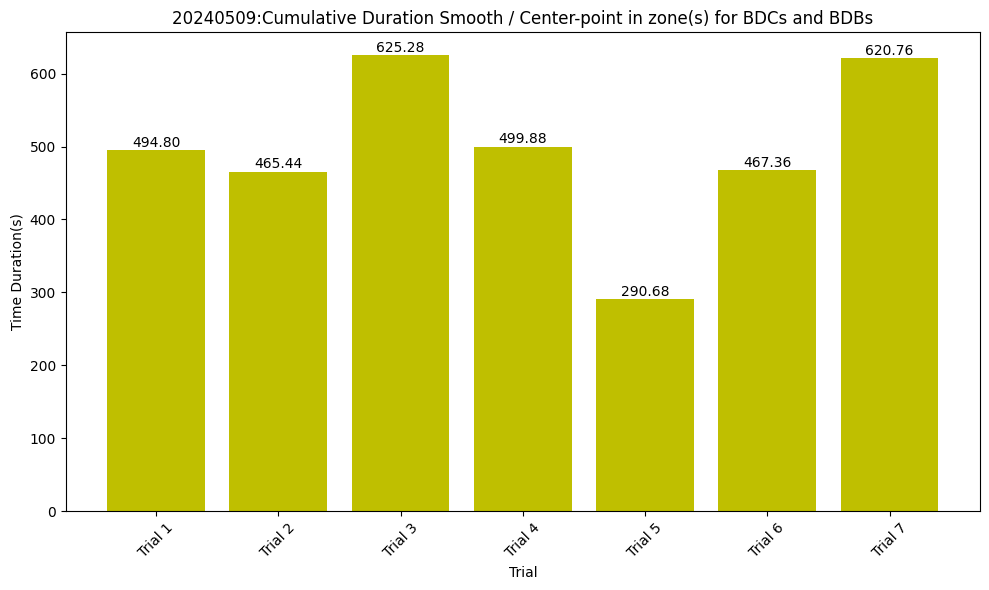

In [84]:
data_strings = [
    'Trial 1,7200.87,7.74687,-18640.6,20555,92,98,6,86,61,341.04,2.08,36.6694,62,494.8,0,53.202',
    'Trial 2,5374.73,5.78227,-833.742,704.621,77,83,6,71,53,275.4,0,29.6116,63,465.44,0.52,50.0452',
    'Trial 3,5188.79,5.58487,-21288.4,21499.2,47,51,4,46,37,219.04,0.28,23.5517,59,625.28,13.16,67.2315',
    'Trial 4,8056.64,8.71057,-1030.46,1051.79,105,108,3,101,65,316.458,4.5214,34.2129,80,499.875,0,54.0425',
    'Trial 5,5049.98,5.43289,-23533.6,23493.1,49,54,5,48,88,380.08,0.04,40.8671,29,290.68,331.96,31.2546',
    'Trial 6,8252.99,8.87877,-17634.2,15058.6,139,150,11,131,85,322.84,0.04,34.7125,102,467.36,1.04,50.2516',
    'Trial 7,3375.11,3.63103,-772.506,694.819,38,38,0,37,54,249.2,0.44,26.7945,32,620.76,1.92,66.7455'
]

trials = []
center_point_distance_moved = []
mean_center_point_velocity = []
rough_center_point_in_zone_frequency= []
smooth_center_point_in_zone_frequency = []
cumulative_duration_rough_zone_time_s = []
cumulative_duration_smooth_zone_time_s = []

for data_str in data_strings:
    parts = data_str.split(',')
    trials.append(parts[0])  
    center_point_distance_moved.append(float(parts[1])) 
    mean_center_point_velocity.append(float(parts[2]))  
    rough_center_point_in_zone_frequency.append(float(parts[9])) 
    smooth_center_point_in_zone_frequency.append(float(parts[13]))
    cumulative_duration_rough_zone_time_s.append(float(parts[10]))  
    cumulative_duration_smooth_zone_time_s.append(float(parts[14]))  

# Plotting Distance Moved
plt.figure(figsize=(10, 6))
plt.bar(trials, center_point_distance_moved, color='g')
plt.title('20240509:Distance Moved for BDCs and BDBs')
plt.xlabel('MouseID')
plt.ylabel('Distance Moved (cm)')
plt.xticks(rotation=45)   # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Plotting Mean Velocity
plt.figure(figsize=(10, 6))
plt.bar(trials, mean_center_point_velocity, color='b')
plt.title('20240509:Mean Velocity for BDCs and BDBs')
plt.xlabel('Trial')
plt.ylabel('Mean Velocity (cm/s)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Plotting rough_center_point_in_zone_frequency
plt.figure(figsize=(10, 6))
plt.bar(trials, rough_center_point_in_zone_frequency, color='r')
annotate_bars(plt.gca(),rough_center_point_in_zone_frequency)
plt.title('20240509:Rough / Center-point in zone(Frequency) for BDCs and BDBs')
plt.xlabel('Trial')
plt.ylabel('In zone frequency')
plt.xticks(rotation=45) 
plt.ylim(0, max(smooth_center_point_in_zone_frequency)) # Set y-axis limit 
plt.tight_layout()
plt.show()

# Plotting smooth_center_point_in_zone_frequency
plt.figure(figsize=(10, 6))
plt.bar(trials, smooth_center_point_in_zone_frequency, color='r')
annotate_bars(plt.gca(),smooth_center_point_in_zone_frequency)
plt.title('20240509:Smooth / Center-point in zone(Frequency) for BDCs and BDBs')
plt.xlabel('Trial')
plt.ylabel('In zone frequency')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



# Plotting cumulative_duration_rough_zone_time_s
plt.figure(figsize=(10, 6))
plt.bar(trials, cumulative_duration_rough_zone_time_s, color='y')
annotate_bars(plt.gca(), cumulative_duration_rough_zone_time_s)
plt.title('20240509:Cumulative Duration Rough / Center-point in zone(s) for BDCs and BDBs')
plt.xlabel('Trial')
plt.ylabel('Time Duration(s)')
plt.xticks(rotation=45)
plt.ylim(0, max(cumulative_duration_smooth_zone_time_s))
plt.tight_layout()
plt.show()

# Plotting cumulative_duration_smooth_zone_time_s
plt.figure(figsize=(10, 6))
plt.bar(trials, cumulative_duration_smooth_zone_time_s, color='y')
annotate_bars(plt.gca(), cumulative_duration_smooth_zone_time_s)
plt.title('20240509:Cumulative Duration Smooth / Center-point in zone(s) for BDCs and BDBs')
plt.xlabel('Trial')
plt.ylabel('Time Duration(s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [74]:
print(rough_center_point_in_zone_frequency)
print(smooth_center_point_in_zone_frequency)
print(cumulative_duration_rough_zone_time_s)
print(cumulative_duration_smooth_zone_time_s)

[61.0, 53.0, 37.0, 65.0, 88.0, 85.0, 54.0]
[62.0, 63.0, 59.0, 80.0, 29.0, 102.0, 32.0]
[341.04, 275.4, 219.04, 316.458, 380.08, 322.84, 249.2]
[494.8, 465.44, 625.28, 499.875, 290.68, 467.36, 620.76]


In [90]:
#Time duration in rough vs smooth t-test
print(scipy.stats.ttest_rel(cumulative_duration_smooth_zone_time_s,cumulative_duration_rough_zone_time_s))
#Frequency in rough vs smooth t-test
print(scipy.stats.ttest_rel(rough_center_point_in_zone_frequency,smooth_center_point_in_zone_frequency))

TtestResult(statistic=3.1375000921943474, pvalue=0.020131744089113578, df=6)
TtestResult(statistic=0.20891692905600615, pvalue=0.84142528120073, df=6)
